görünüt işleme

Grayscale şekli: (28, 28)
RGB şekli: (32, 32, 3)


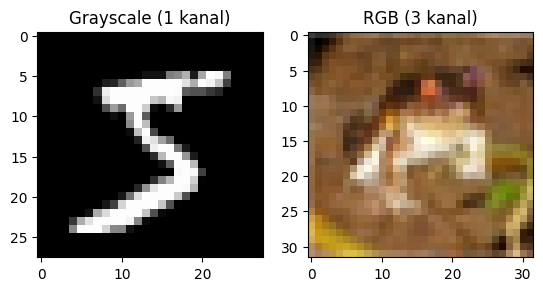

In [10]:
# Gerekli kütüphaneler içe aktarılıyor
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist, cifar10

# MNIST veri setinden grayscale (gri tonlamalı) görüntü alınır
# (X_train,y_train),(X_test,y_test)
(X_grey, _), _ = mnist.load_data()  # Sadece görüntüler alınıyor, etiketler kullanılmıyor
grey_img = X_grey[0]  # İlk görüntü alınır (28x28 boyutunda)
print("Grayscale şekli:", grey_img.shape)

# CIFAR-10 veri setinden RGB (renkli) görüntü alınır
(X_rgb, _), _ = cifar10.load_data()  # Sadece görüntüler alınıyor
rgb_img = X_rgb[0]  # İlk görüntü alınır (32x32 boyutunda, 3 kanal - RGB)
print("RGB şekli:", rgb_img.shape)

# Görselleri yan yana çiz
plt.subplot(1, 2, 1)  # 1 satır, 2 sütunluk bir çizim alanında 1. görsel
plt.imshow(grey_img, cmap='gray')  # Gri tonlamalı görüntü gösterilir
plt.title("Grayscale (1 kanal)")

plt.subplot(1, 2, 2)  # Aynı çizim alanında 2. görsel
plt.imshow(rgb_img)  # RGB görüntü gösterilir
plt.title("RGB (3 kanal)")

plt.show()  # Görselleri ekrana getir

burda önceki olduğu gibi etiketler yoktur . biz oluştururuz(klasör mantığı)

giriş_size = 5x5 , filter = 3x3
* padding = 'valid' , stride = 1

filtre kenarlarda taşmadığı için 3 konuma oturabilir.

cıktı boyutu (5-3+1) = 3    3x3


* padding = 'same' , stride = 1

kenarlara 1 sıra sıfıt eklenir.

filtre tüm girişleri kapsar


* padding = 'same' , stride = 2

2^şer adım atlandığı için çıktı küçülür.

In [11]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

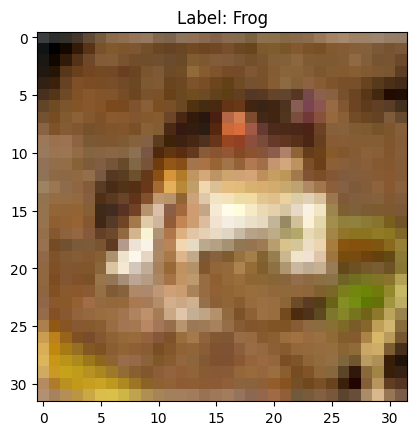

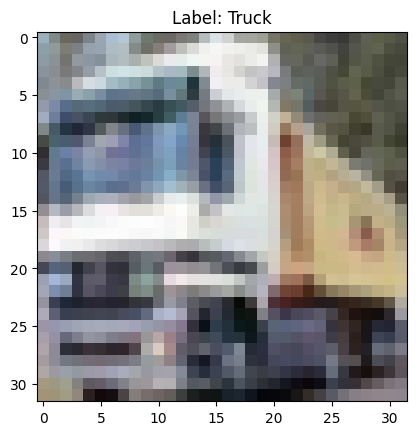

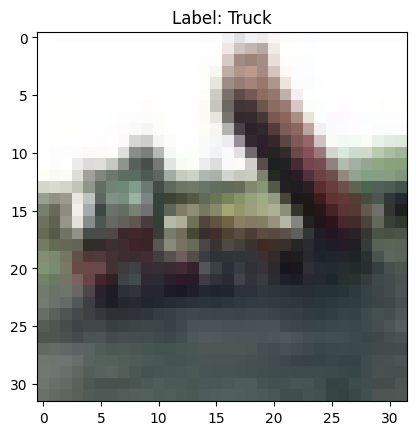

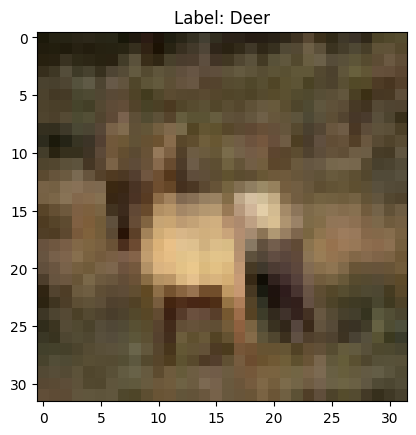

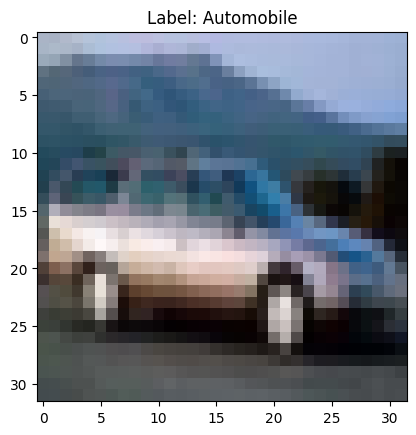

In [13]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer',
 'Dog','Frog','Horse','Ship','Truck']

for i in range(5):
  plt.imshow(X_train[i])
  plt.title(f"Label: {class_names[y_train[i][0]]}")
  plt.show()

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
  rotation_range=15, # 15 dereceye kadar döndürme
  width_shift_range=0.1, # %10 yatay kaydirma
  height_shift_range=0.1, # %10 dikey kaydirma
  zoom_range=0.1, # %10 ıyakinlastrma
  horizontal_flip=True, # Yatay çevirme
  brightness_range=[0.8, 1.2], # ıParlaklk degisimi
  fill_mode='nearest') # Yeni ıbosluklar yakin pikselle doldur
datagen.fit(X_train)

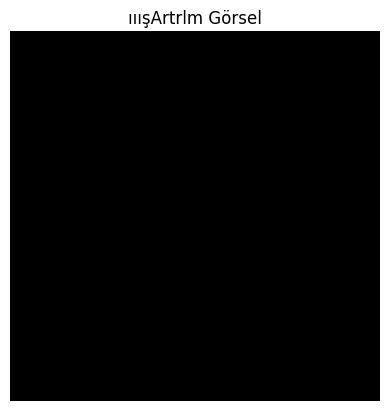

In [15]:
for X_batch, y_batch in datagen.flow(X_train, y_train_cat,
batch_size=1):
  plt.imshow(X_batch[0])
  plt.title("ııışArtrlm Görsel")
  plt.axis("off")
  plt.show()
  break

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
  Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(128, (3,3), activation='relu'),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax')])

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
batch_size = 64
epochs = 30

history = model.fit(
  datagen.flow(X_train, y_train_cat, batch_size=
  batch_size),
  steps_per_epoch = X_train.shape[0] // batch_size,
  epochs = epochs,
  validation_data = (X_test, y_test_cat)
)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Dogruluk')
plt.plot(history.history['val_accuracy'], label='Dogruluk')
plt.xlabel('Epoch')
plt.ylabel('Dogruluk')
plt.title('Dogruluk Grafigi')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Egitim Kaybi')
plt.plot(history.history['val_loss'], label='Dogrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayip')
plt.title('Kayip Grafigi')
plt.legend()
plt.show()

In [ ]:
import numpy as np

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_cat, axis=1)

correct = np.where(predicted_classes == true_classes)[0]

for i in range(5):
  idx = correct[i]
  plt.imshow(X_test[idx])
  plt.title(f"Tahmin: {class_names[predicted_classes[idx]]}\nGerçek: {class_names[true_classes[idx]]}")
  plt.axis("off")
  plt.show()

In [ ]:
incorrect = np.where(predicted_classes != true_classes)[0]

for i in range(5):
  idx = incorrect[i]
  plt.imshow(X_test[idx])
  plt.title(f"Tahmin: {class_names[predicted_classes[idx]]}\nGerçek: {class_names[true_classes[idx]]}")
  plt.axis("off")
  plt.show()

In [19]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.2/107.7 GB disk)


In [20]:
!yolo predict model=yolo11n.pt source='https://ultralytics.com/images/zidane.jpg'


100% 5.35M/5.35M [00:00<00:00, 59.0MB/s]
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 49.2k/49.2k [00:00<00:00, 4.34MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 152.1ms
Speed: 16.7ms preprocess, 152.1ms inference, 30.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [22]:
!yolo predict model=yolo11n.pt source='https://ultralytics.com/images/bus.jpg'


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 134k/134k [00:00<00:00, 4.65MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 178.7ms
Speed: 6.8ms preprocess, 178.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
